# Salary predictions using Multivariate Linear Regression
* In this project, we are faced with the challange to predict how much people earn taking into account more than one feature or characteristic using multivariate linear regression which takes the formula. 

\begin{align}
\dot{y} &= \ a+ bx+cx+... nx\\
\end{align}



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Have a look at the structure of our data

In [2]:
df= pd.read_csv('../data/salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
df.shape

(514, 11)

A brief description of our data. We have 514 entries, and only one value is missing, found in the salary column. All columns are of type float or integer.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [5]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


The table above contains a descritptive statistics of the data at hand. Most of the columns here are categorical. 

One column which looks very strange is the yearsabs column, which is how many years a person was away from the job market due to illness or parenting. The maximum is 118, which is down right impossible.

### Fill null  value with mean

In [6]:
df[df.salary.isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [7]:
df.dropna(axis=0, inplace=True)

## Exploratory data analysis

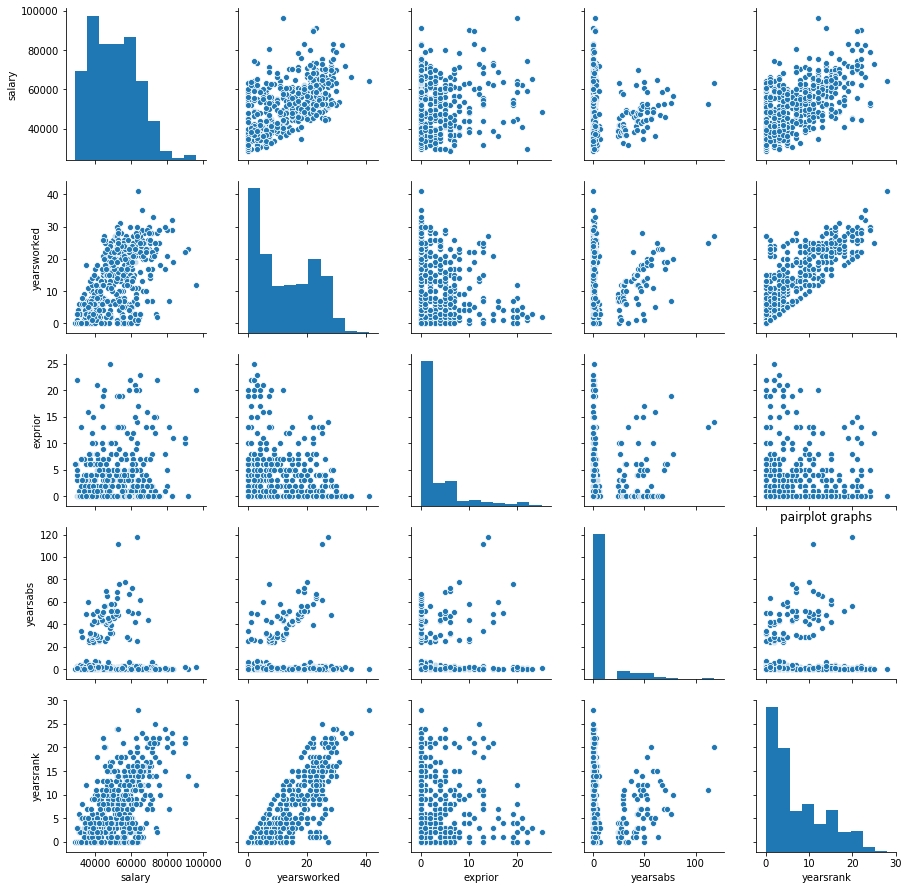

In [8]:
sns.pairplot(df[['salary', 'yearsworked', 'exprior', 'yearsabs', 'yearsrank']])
plt.title('pairplot graphs')
plt.show()

Looking above at the relationships between the various features, we notice a couple of interesting linear relationships;

1. salary and yearsworked
2. salary and yearsrank

### multicolinear
years worked and years rank have linear relationship which is easy to see. will explore on this later if it will violate our linear model principles.

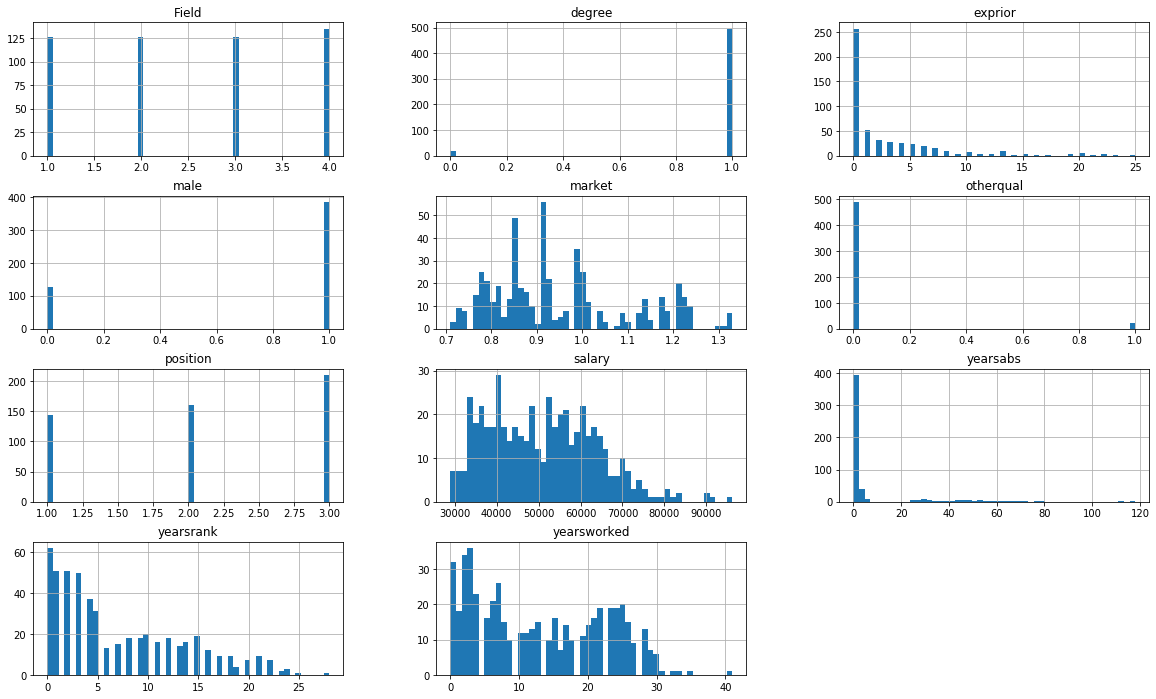

In [9]:
df.hist(bins=50, figsize=(20,12))
plt.title('columns histogram graphs')
plt.show()

### Check outlier

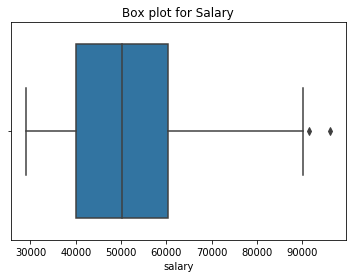

In [10]:
sns.boxplot(df.salary)
plt.title('Box plot for Salary')
plt.show()

A few outliers are spotted earning more than 90000. We decided to leave them in our data as they are not too far out above the upper bound of our box whiskas and don't seem to be incorrect entries.

# training and test data split
We then split our data with a ratio of:
* 75% train data
* 25% test data

In [11]:
np.random.seed(10)

shuffled_index= np.random.permutation(len(df))
train_set_size= int(len(df)*0.75)
train_set_size
train_index= shuffled_index[:train_set_size]
test_index= shuffled_index[train_set_size:]
train= df.iloc[train_index]
test= df.iloc[test_index]

In [12]:
print(f'train set shape: {train.shape}')
print(f'test set shape: {test.shape}')

train set shape: (384, 11)
test set shape: (129, 11)


## Correlation Matrix

In [13]:
corr_matrix= df.corr()
#corr_matrix['salary'].sort_values(ascending=False)
corr_matrix.drop('salary')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778
yearsabs,-0.069630,0.132022,0.056113,0.035962,-0.167177,0.029447,-0.017792,0.030521,-0.622058,0.000778,1.000000


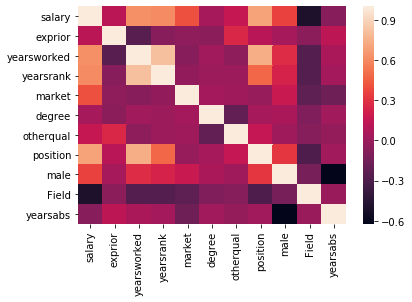

In [14]:
sns.heatmap(corr_matrix)

In [15]:
corr_matrix= train.corr()
corr_matrix['salary'].sort_values(ascending=False)

salary         1.000000
position       0.700417
yearsworked    0.621150
yearsrank      0.616485
market         0.430704
male           0.394322
otherqual      0.163496
exprior        0.142598
degree         0.059293
yearsabs      -0.077815
Field         -0.517136
Name: salary, dtype: float64

# Normalize
Chose to normalize our data such that it is in roughly in the same range. 


In [16]:
def normalize(value, average, col_range):
    x= (value- average)/col_range
    return x

In [17]:
#Assigning train data to x and y data
X_train= train.iloc[:,1:]
y_train= train['salary']

#Assigning test data to x and y data
X_test= test.iloc[:,1:]
y_test= test['salary']


In [18]:
X_train.head()

,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
316,23,3,3,1.00,1,0,3,1,2,0
419,0,6,4,0.79,1,0,1,0,2,1
194,0,20,5,0.82,1,0,2,1,4,1
267,0,24,8,0.92,1,0,3,1,3,0
262,0,25,9,0.85,1,0,3,1,2,1


## 2. One-hot encode the variable Field into three dummy variables, using HR as the reference category. 

## Get dummy variables
Since we have categorical features, in order to feed them to our machine learning algorithm, we make dummy variables, containing 1 where the observation is True and 0 otherwise.

In [19]:
X_train= pd.get_dummies(X_train, columns=['position', 'Field'],drop_first=True)
X_test= pd.get_dummies(X_test, columns=['position', 'Field'],drop_first=True)

In [20]:
X_train.head()


,exprior,yearsworked,yearsrank,market,degree,otherqual,male,yearsabs,position_2,position_3,Field_2,Field_3,Field_4
316,23,3,3,1.00,1,0,1,0,0,1,1,0,0
419,0,6,4,0.79,1,0,0,1,0,0,1,0,0
194,0,20,5,0.82,1,0,1,1,1,0,0,0,1
267,0,24,8,0.92,1,0,1,0,0,1,0,1,0
262,0,25,9,0.85,1,0,1,1,0,1,1,0,0


In [21]:
train_dummy= pd.concat( [y_train,X_train ], axis=1)
new_corr= train_dummy.corr()
new_corr['salary'].sort_values(ascending=False)

salary         1.000000
position_3     0.674231
yearsworked    0.621150
yearsrank      0.616485
market         0.430704
male           0.394322
Field_2        0.242532
otherqual      0.163496
exprior        0.142598
degree         0.059293
yearsabs      -0.077815
position_2    -0.198122
Field_4       -0.241528
Field_3       -0.450296
Name: salary, dtype: float64

# Feature Selection
Select features using a wrapper method. We use backward elimination.

The function below creates a model with all the features then checks for feature with the p-values greater than 0.05 if found it removes the feature, until we only have features with the p-value less than 0.05.

In [22]:
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    #X_1 =remaining columns
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    #statistical significance for each feature
    p = pd.Series(model.pvalues.values[1:],index = cols)
    #the feature with the highest p-value
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        #remove statistically insignificant feature. anything above 5%
        cols.remove(feature_with_p_max)
    else:
        break
best_features = cols

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.0
Date:                Tue, 26 May 2020   Prob (F-statistic):          1.18e-134
Time:                        12:55:54   Log-Likelihood:                -3845.1
No. Observations:                 384   AIC:                             7710.
Df Residuals:                     374   BIC:                             7750.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.322e+04   2294.314      5.762      0.000    8708.044    1.77e+04
exprior      264.6635     61.207      4.324      0.000     144.311     385.016
yearsrank    675.0913     51.495     13.110      0.000     573.834     776.348
market      3.011e+04   1991.606     15.118      0.000    2.62e+04     3.4e+04
yearsabs     -37.1157     17.624     -2.106      0.036     -71.771      -2.461
position_2  4868.7802    760.623      6.401      0.000    3373.147    6364.413
position_3  1.373e+04    831.408     16.511      0.000    1.21e+04    1.54e+04
Field_2    -2306.6874    787.401     -2.929      0.004   -3854.976    -758.399
Field_3    -6221.6014    950.645     -6.545      0.000   -8090.880   -4352.322
Field_4    -5840.3962    836.481     -6.982      0.000   -7485.191   -4195.601
==============================================================================
Omnibus:                       27.991   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.664
Skew:                           0.493   Prob(JB):                     2.00e-10
Kurtosis:                       4.348   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check for multicollinearity
In order to check for multicollinearity between our features, we applied a Variance Inflation Factor. 

Values which have a VIF above 5 indicate that there may be multicollinearity and a VIF score of above 10 show that there is certainly mutlicollinearity.

VIF= 1/T

where T is Tolerance
T= 1- R^2

In [23]:
#VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train= X_train[best_features]
X_test= X_test[best_features]
X_train= sm.add_constant(X_train)
pd.Series([variance_inflation_factor(X_train.values, i) 
          for i in range(X_train.shape[1])],
         index=X_train.columns)

const         67.491446
exprior        1.058576
yearsrank      1.433054
market         1.193449
yearsabs       1.081767
position_2     1.600884
position_3     2.146222
Field_2        1.540922
Field_3        1.980239
Field_4        1.760904
dtype: float64

No strange Variance Inflaction factor is seen

In [24]:
model= sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.0
Date:                Tue, 26 May 2020   Prob (F-statistic):          1.18e-134
Time:                        12:55:54   Log-Likelihood:                -3845.1
No. Observations:                 384   AIC:                             7710.
Df Residuals:                     374   BIC:                             7750.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.322e+04   2294.314      5.762      0.000    8708.044    1.77e+04
exprior      264.6635     61.207      4.324      0.000     144.311     385.016
yearsrank    675.0913     51.495     13.110      0.000     573.834     776.348
market      3.011e+04   1991.606     15.118      0.000    2.62e+04     3.4e+04
yearsabs     -37.1157     17.624     -2.106      0.036     -71.771      -2.461
position_2  4868.7802    760.623      6.401      0.000    3373.147    6364.413
position_3  1.373e+04    831.408     16.511      0.000    1.21e+04    1.54e+04
Field_2    -2306.6874    787.401     -2.929      0.004   -3854.976    -758.399
Field_3    -6221.6014    950.645     -6.545      0.000   -8090.880   -4352.322
Field_4    -5840.3962    836.481     -6.982      0.000   -7485.191   -4195.601
==============================================================================
Omnibus:                       27.991   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.664
Skew:                           0.493   Prob(JB):                     2.00e-10
Kurtosis:                       4.348   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Autocorrelation
Our model shows that we have no sign of autocorrelation. This is observed by looking at the Durbin-Watson test performed which is eqaual to 2. 
The Durbin-Watson test outputs a value ranging from 0 to 4. 
* The closer to 0 the statistic, the more evidence for positive serial correlation.
* The closer to 4, the more evidence for negative serial correlation.
* Values closer to 2 indicate no serial correlation.


## most important features

In [25]:
model.params.sort_values(ascending=False)

market        30109.114122
position_3    13727.637066
const         13219.416888
position_2     4868.780164
yearsrank       675.091279
exprior         264.663450
yearsabs        -37.115665
Field_2       -2306.687387
Field_4       -5840.396160
Field_3       -6221.601365
dtype: float64

We see that our most important features for predicting salary are listed above in descending order.

## 5. standardised residuals and standardised predicted values


In [26]:
#get residuals and fitted values from the model
resids= model.resid
fitted= model.fittedvalues

#normalize residuals
resids_range= resids.max()- resids.min()
resids_avg= resids.mean()
resids = resids.apply(normalize, args=(resids_avg, resids_range))

#normalize the fitted values
fitted_range= fitted.max()- fitted.min()
fitted_avg= fitted.mean()
fitted=fitted.apply(normalize, args=(fitted_avg, fitted_range))

## 6. plot residuals versus predicted

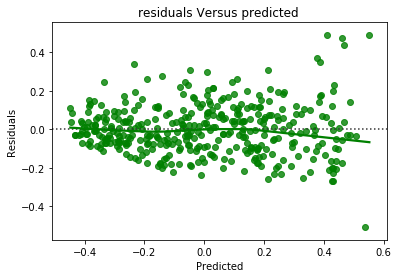

In [27]:
sns.residplot(fitted, resids, lowess=True, color='green')
plt.title('residuals Versus predicted ')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

In [28]:
round(sum(resids))

0

Our residuals are normally distributed and the sum of our residuals is zero. This gives us no indication that the assumptions of our model are False.

## 7. Running the model on the test

In [29]:
X_test= sm.add_constant(X_test)
preds= model.predict(X_test)
train_preds= model.predict(X_train)

In [30]:
from statsmodels.tools.eval_measures import rmse
model_rmse= rmse(y_test, preds)
rmse_train= rmse(y_train, train_preds)


print(f'train rmse: {rmse_train}')
print(f'test rmse: {model_rmse}')
print(f'difference between train and test: {model_rmse- rmse_train}')

train rmse: 5400.877964875524
test rmse: 5639.976337309231
difference between train and test: 239.09837243370657


In [31]:
rev_preds= np.exp(preds)
rev_y_test= np.exp(y_test)

rev_train_preds= np.exp(train_preds)
rev_y_train= np.exp(y_train)

#rmse
model_rmse= rmse(rev_y_test, rev_preds)
rmse_train= rmse(rev_y_train, rev_train_preds)


print(f'train rmse: {rmse_train}')
print(f'test rmse: {model_rmse}')
print(f'difference between train and test: {model_rmse- rmse_train}')

train rmse: nan
test rmse: nan
difference between train and test: nan


Our model is performing better on the training set compared to our test set. This means that our model is slightly underfitting on our training data.

Overall, it seems like a really good model to work with. It does not violate any of the linear regression assumptions, namely:
* Linear relationship
* Multivariate normality
* No or little multicollinearity
* No auto-correlation
* Homoscedasticity

# Conclusion


After analysing our data, we then created our ideal linear model using a backward elimination which is a wrapper method. It took more computing power, but it gave us the best features for our modelling. 

Interestingly, years worked is not one of the best features to predict how much someone earns. This is because years worked is highly correlated to other features. Our top 3 features were:
1. market
2. Position
3. Field

We can trust this model to make good predictions most of the time. It is not watertight.

## Log scaler


In [32]:
model1= sm.OLS(y_train, X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.0
Date:                Tue, 26 May 2020   Prob (F-statistic):          1.18e-134
Time:                        12:55:56   Log-Likelihood:                -3845.1
No. Observations:                 384   AIC:                             7710.
Df Residuals:                     374   BIC:                             7750.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.322e+04   2294.314      5.762      0.000    8708.044    1.77e+04
exprior      264.6635     61.207      4.324      0.000     144.311     385.016
yearsrank    675.0913     51.495     13.110      0.000     573.834     776.348
market      3.011e+04   1991.606     15.118      0.000    2.62e+04     3.4e+04
yearsabs     -37.1157     17.624     -2.106      0.036     -71.771      -2.461
position_2  4868.7802    760.623      6.401      0.000    3373.147    6364.413
position_3  1.373e+04    831.408     16.511      0.000    1.21e+04    1.54e+04
Field_2    -2306.6874    787.401     -2.929      0.004   -3854.976    -758.399
Field_3    -6221.6014    950.645     -6.545      0.000   -8090.880   -4352.322
Field_4    -5840.3962    836.481     -6.982      0.000   -7485.191   -4195.601
==============================================================================
Omnibus:                       27.991   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.664
Skew:                           0.493   Prob(JB):                     2.00e-10
Kurtosis:                       4.348   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OOP

In [33]:
import sys
sys.path.append('../')
from src.ErrorCalculator import ErrorCalculator
my_err1= ErrorCalculator(preds, y_test)
my_err1.error_summary()

error summary:
average standard residuals: -3.4425520143415706e-17
minimum standard residuals: -1.867931039427622
maximum standard residuals: 3.265716458334159
MSE: 31809333.085408054
RMSE: 5639.976337309232


# Model2

In [34]:
X_train= X_train.drop('yearsrank', axis=1)
X_test= X_test.drop('yearsrank', axis=1)

In [35]:
X_train.shape

(384, 9)

In [36]:
model2= sm.OLS(y_train, X_train).fit()
preds2= model2.predict(X_test)
train_preds2= model2.predict(X_train)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     134.4
Date:                Tue, 26 May 2020   Prob (F-statistic):          3.50e-105
Time:                        12:55:57   Log-Likelihood:                -3917.7
No. Observations:                 384   AIC:                             7853.
Df Residuals:                     375   BIC:                             7889.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.883e+04   2719.531      6.923      0.000    1.35e+04    2.42e+04
exprior      142.3242     72.983      1.950      0.052      -1.182     285.830
market      2.792e+04   2394.388     11.659      0.000    2.32e+04    3.26e+04
yearsabs     -22.1916     21.219     -1.046      0.296     -63.915      19.532
position_2  7009.1532    896.300      7.820      0.000    5246.749    8771.557
position_3  1.819e+04    915.117     19.879      0.000    1.64e+04       2e+04
Field_2    -2087.6620    949.785     -2.198      0.029   -3955.234    -220.090
Field_3    -8413.7868   1129.069     -7.452      0.000   -1.06e+04   -6193.687
Field_4    -7591.3861    996.264     -7.620      0.000   -9550.351   -5632.421
==============================================================================
Omnibus:                       52.024   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.719
Skew:                           0.790   Prob(JB):                     7.35e-21
Kurtosis:                       4.817   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#model 2 summary
my_err2= ErrorCalculator(preds2, y_test)


## Compare models

In [38]:
print(f' model 1 has an rmse of : {my_err1.get_rmse()}')
print(f' model 2 has an rmse of : {my_err2.get_rmse()}')


 model 1 has an rmse of : 5639.976337309232
 model 2 has an rmse of : 6703.232397743595


Model 1 (with yearsrank feature) performs better than Model 2. This is seen by model 2 having a greater error (which is what we are trying to minimize) than model 1. This means the predictions in model 1 are better. 

In [39]:
# reverse log
rev_preds2= np.exp(preds2)
rev_y_test2= np.exp(y_test)

rev_train_preds2= np.exp(train_preds2)
rev_y_train2= np.exp(y_train)

#-----------------------------------------------------------------------

my_err= ErrorCalculator(rev_preds2, rev_y_test)
test_rmse2= my_err.get_rmse()

my_err= ErrorCalculator(rev_train_preds2, rev_y_train2)
train_rmse2= my_err.get_rmse()

print(f' train rmse: {train_rmse2}')
print(f' test rmse: {test_rmse2}')
print(f' difference between train and test for model 2: {test_rmse2- train_rmse2}')

 train rmse: nan
 test rmse: nan
 difference between train and test for model 2: nan


# Plot
 

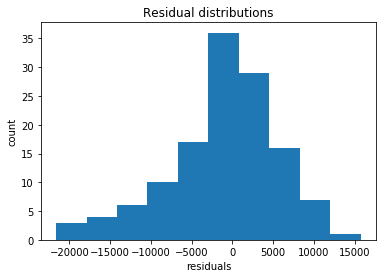

In [40]:
from src.Plotter import Plotter
Plotter(preds2, y_test).plot()

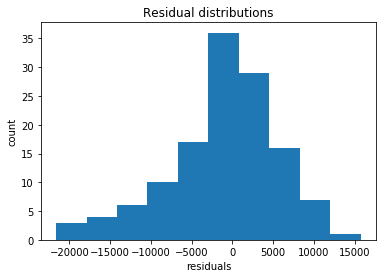

In [41]:
from src.HistogramPlotter import HistogramPlotter
HistogramPlotter(preds2, y_test).plot()

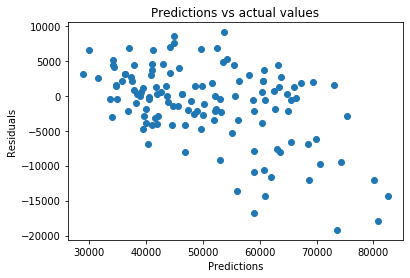

In [42]:
from src.ScatterPlotter import ScatterPlotter
ScatterPlotter(preds, y_test).plot()
